# Midterm Group 11

    Name:                     Student number:
    Sunny van Leeuwen         4698533
    Femke Mureau              4662318
    Josephine Scholten        4884787
    Jochem van Dijk           4936217
    Matthias Santing          4703758

In [1]:
import numpy as np
import pandas as pd
import cbsodata as cbs
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import time

Also, a new folder is created in which the figures can be saved

In [2]:
if not os.path.exists("Images"):
    os.mkdir("Images")

## Import all the datasets needed

Firstly, all the necessary datasets are imported directly from the CBS with the cbsodata packages.
Depending on the internet connection and computer specifications, this can take a couple of minutes.

In [3]:
#data_travel = pd.DataFrame(cbsodata.get_data('84713ENG'))
tic = time.perf_counter()
df_regio = pd.DataFrame(cbs.get_data('83488ENG')) # Insert dataset with Licenseholder data
tac = time.perf_counter()
print(f'Regional data is downloaded in {tac-tic:.2f} seconds : Progress is {1/7*100:.2f} %')

tic = time.perf_counter()
df_population = pd.DataFrame(cbs.get_data('37259ENG'))   # Insert dataset with population data
tac = time.perf_counter()
print(f'Population data is downloaded in {tac-tic:.2f} seconds : Progress is {2/7*100:.2f}%')

tic = time.perf_counter()
df_trips = pd.DataFrame(cbs.get_data('84708ENG')) # Insert dataset with trips values for different modes
tac = time.perf_counter()
print(f'Trips data is downloaded in {tac-tic:.2f} seconds : Progress is {3/7*100:.2f}%')

tic = time.perf_counter()
data_traffic_original = pd.DataFrame(cbs.get_data('84707ENG'))
tac = time.perf_counter()
print(f'Traffic data is downloaded in {tac-tic:.2f} seconds : Progress is {4/7*100:.2f}%')

tic = time.perf_counter()
data_motief = pd.DataFrame(cbs.get_data('84713NED'))
tac = time.perf_counter()
print(f'Travel motive data is downloaded in {tac-tic:.2f} seconds : Progress is {5/7*100:.2f}%')

tic = time.perf_counter()
data_mot_original = pd.DataFrame(cbs.get_data('84709ENG')) # insert dataset with modes of travel data
tac = time.perf_counter()
print(f'Modes of travel data is downloaded in {tac-tic:.2f} seconds : Progress is {6/7*100:.2f}%')

tic = time.perf_counter()
df_pop_henk = pd.DataFrame(cbs.get_data('7461ENG'))   # Insert dataset with population data
tac = time.perf_counter()
print(f'Population dataset 2 is downloaded in {tac-tic:.2f} seconds : Progress is {7/7*100:.2f}%')

Regional data is downloaded in 2.30 seconds : Progress is 14.29 %
Population data is downloaded in 62.65 seconds : Progress is 28.57%
Trips data is downloaded in 19.82 seconds : Progress is 42.86%
Traffic data is downloaded in 1.01 seconds : Progress is 57.14%
Travel motive data is downloaded in 65.73 seconds : Progress is 71.43%
Modes of travel data is downloaded in 59.16 seconds : Progress is 85.71%
Population dataset 2 is downloaded in 2.41 seconds : Progress is 100.00%


## Drivers license data in The Netherlands

First, we are going to take a look at the driver license holders in the Netherlands.

In [4]:
data_lic = df_regio 

years = list(set(data_lic.Periods.values))
years = np.sort(years)

df_pop = df_pop_henk[df_pop_henk['Periods'].isin(years)]

ages_pop = ['18 years', '19 years', '20 to 25 years', '25 to 30 years', '30 to 40 years',
            '40 to 50 years', '50 to 60 years', '60 to 65 years', '65 to 70 years', 
            '70 to 75 years', '75 to 80 years', '80 to 90 years', '90 years or older']
df_pop = df_pop[df_pop['Age'].isin(ages_pop)]
df_pop = df_pop[df_pop['Sex'] == 'Men and women']
mapping = {
            '18 years':'18 to 19 years',
            '19 years':'18 to 19 years',
            '20 to 25 years':'20 to 24 years',
            '25 to 30 years':'25 to 29 years',
            '30 to 40 years':'30 to 39 years',
            '40 to 50 years':'40 to 49 years',
            '50 to 60 years':'50 to 59 years',
            '60 to 65 years':'60 to 64 years',
            '65 to 70 years':'65 to 69 years',
            '70 to 75 years':'70 to 74 years' ,
            '75 to 80 years':'75 years or older', 
            '80 to 90 years':'75 years or older', 
            '90 years or older':'75 years or older',
}

df_pop['Age'].replace(mapping, inplace=True)

In [5]:
sorts = data_lic.CategoryDrivingLicence.values
sorts = list(set(sorts))
cars = ['Moped driving licence', 'Passenger car licence incl. trailer', 
        'Passenger car licence excl. trailer', 'Passenger car driving licence total', ]
large_cars= [x for x in sorts if x not in cars]

regions = data_lic.Region.values
regions = list(set(regions))
no_province= ['Noord-Nederland (LD)','Nederland', 'Oost-Nederland (LD)', 'Zuid-Nederland (LD)', 
              'Unclassifiable (LD)', 'West-Nederland (LD)']
provinces = [x for x in regions if x not in no_province]

ages = data_lic.AgeDrivingLicenseHolder.values
ages = list(set(ages))
ages_not = ['16 to 17 years','Age unknown', 'Total']
ages = [x for x in ages if x not in ages_not]
ages = np.sort(ages)

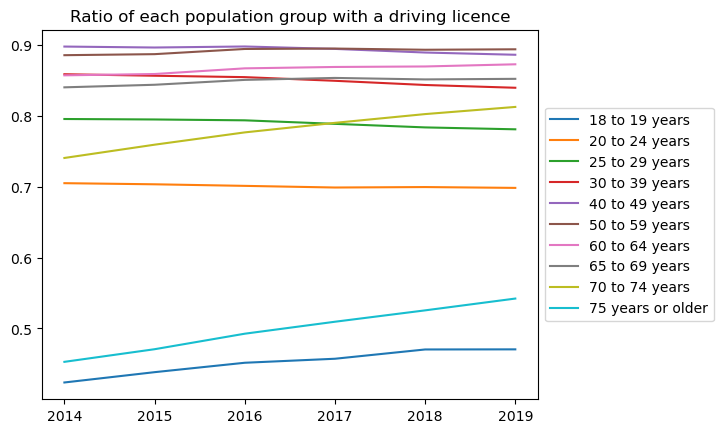

In [6]:
for i in range(len(ages)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == ages[i])
                        & (data_lic.CategoryDrivingLicence == 'Passenger car driving licence total')]
    #display(data_lic_tot)
    data_lic_tot.PeopleWithADrivingLicence_1.astype(int)
    df_pop_tot = df_pop[(df_pop.Age == ages[i])]
    df_pop_new = df_pop_tot.groupby(['Periods']).sum()
    #display(df_pop_new)
    x = np.zeros(len(df_pop_new))
    for j in range(len(df_pop_new)):
        x[j]= data_lic_tot.iloc[j, 5] / df_pop_new.iloc[j, 1]
    df_pop_new['Ratio'] = x
    plt.plot(data_lic_tot.Periods[0:6], df_pop_new.Ratio, label=ages[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Ratio of each population group with a driving licence')
plt.show()

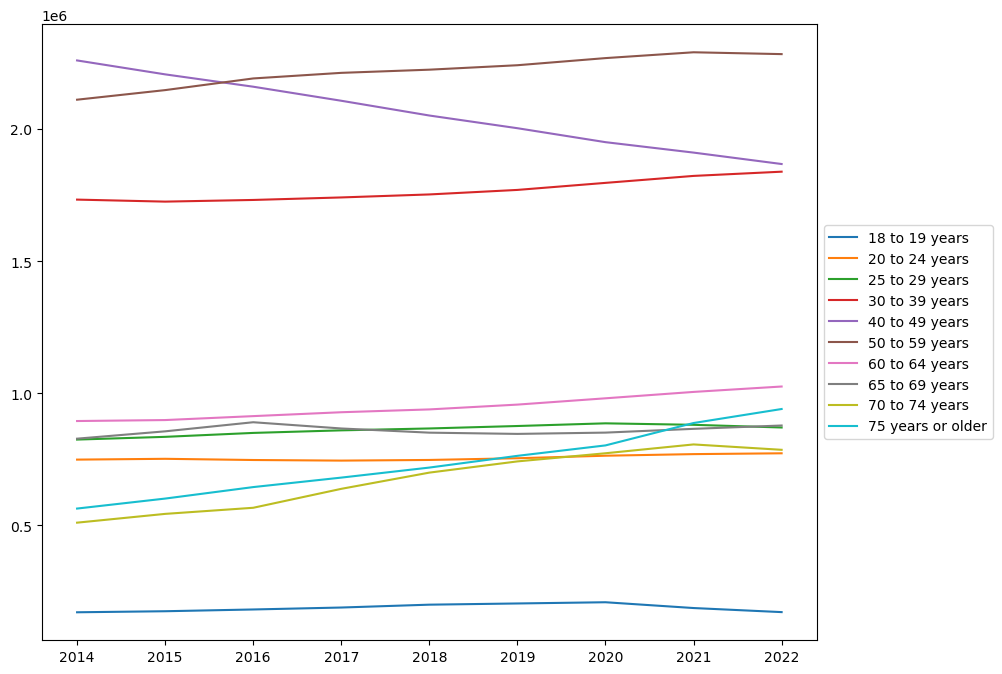

In [7]:
f = plt.figure(figsize=(10, 8))    
for i in range(len(ages)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == ages[i])
                        & (data_lic.CategoryDrivingLicence == 'Passenger car driving licence total')]
    #df_pop_tot = df_pop[(df_pop.Age == ages[i])
    #data_lic_tot['Ratio'] = data_lic_tot.PeopleWithADrivingLicence_1/ df_pop_new.TotalPopulation_1
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=ages[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.ylim()

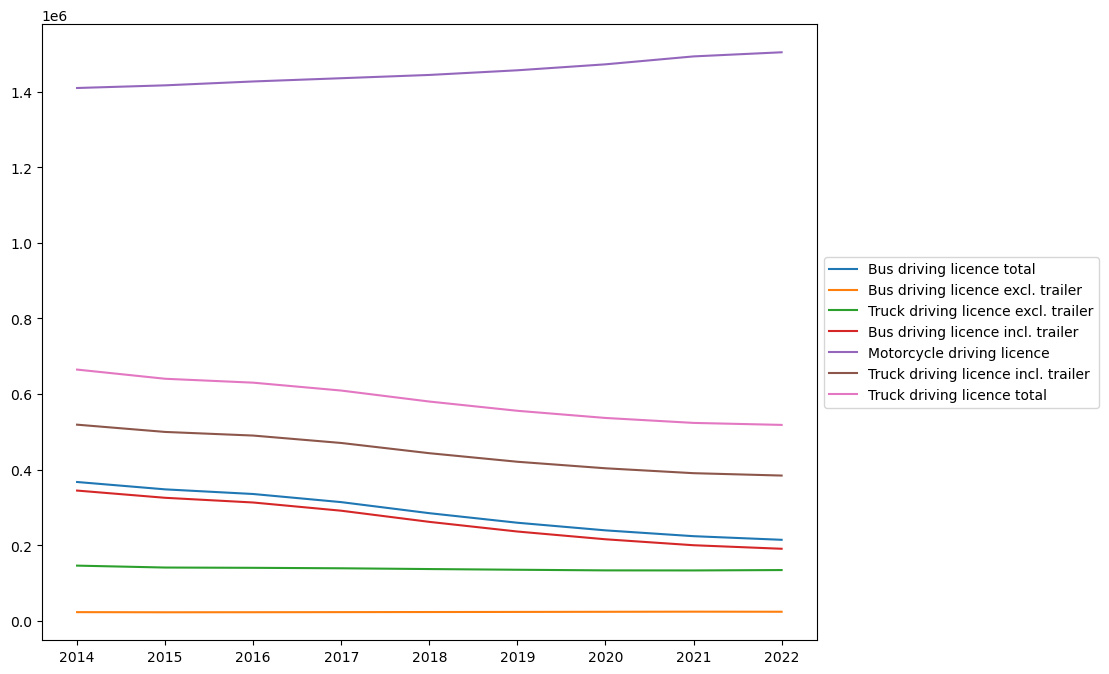

In [8]:
f = plt.figure(figsize=(10, 8))    
for i in range(len(large_cars)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == 'Total')
                        & (data_lic.CategoryDrivingLicence == large_cars[i])]
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=large_cars[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

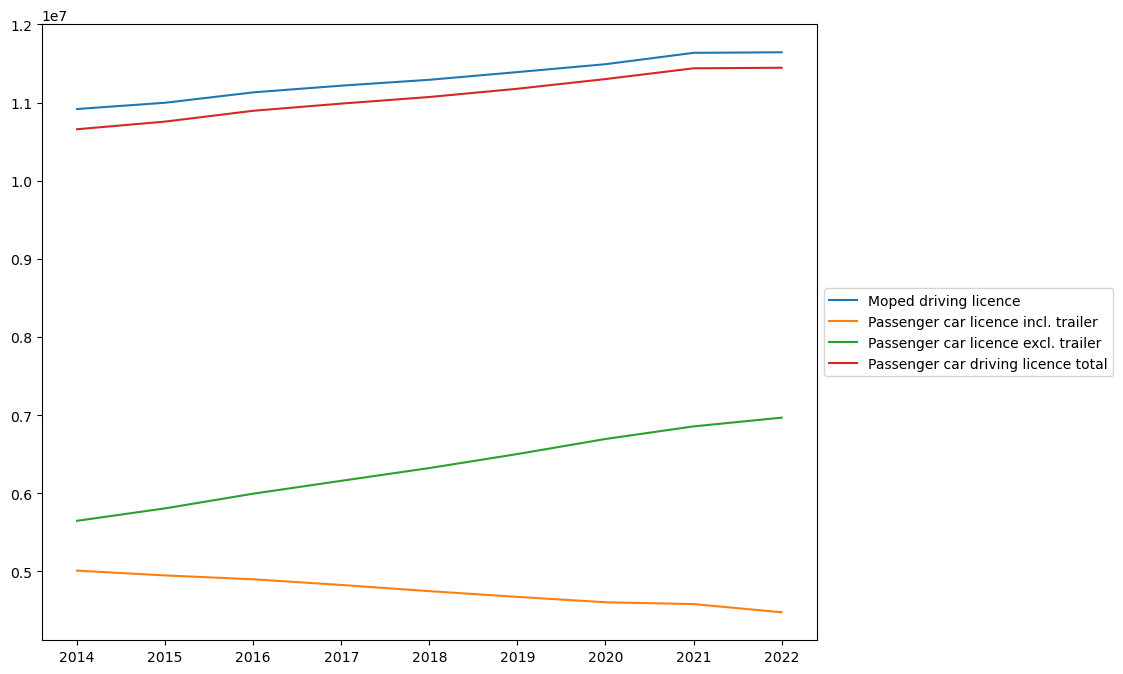

In [9]:
f = plt.figure(figsize=(10, 8))    
for i in range(len(cars)):
    data_lic_tot = data_lic[(data_lic.Region == 'Nederland')
                        & (data_lic.AgeDrivingLicenseHolder == 'Total')
                        & (data_lic.CategoryDrivingLicence == cars[i])]
    plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, label=cars[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

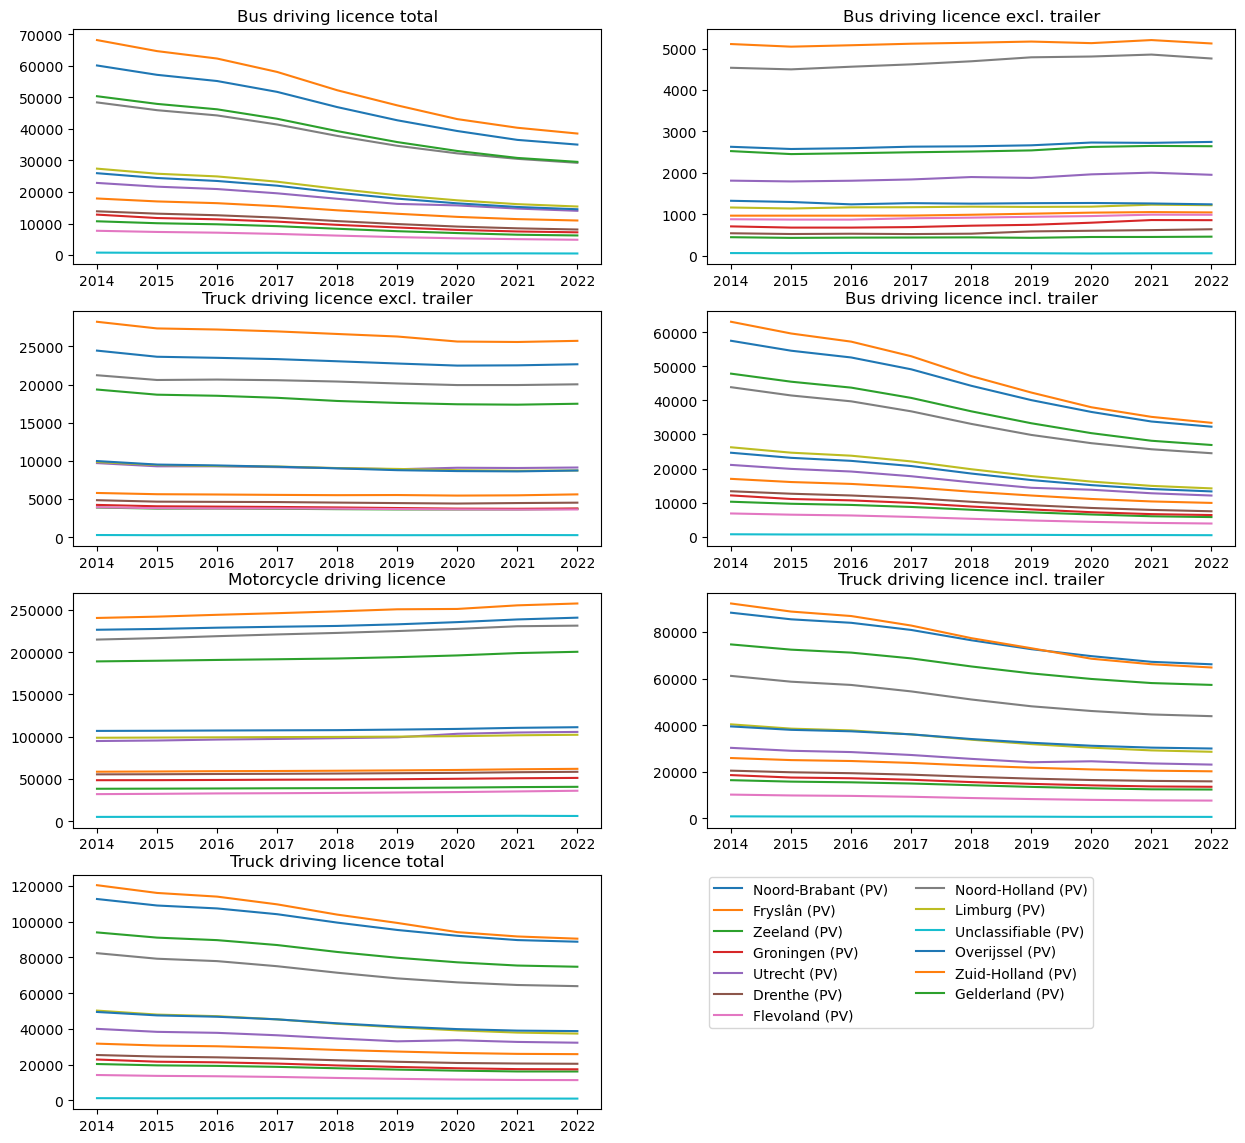

In [10]:
plt.figure(figsize=(15, 25))
for i in range(len(provinces)):
    for j in range(len(large_cars)) :
        plt.subplot(7, 2, j + 1)
        data_lic_tot = data_lic[(data_lic.Region == provinces[i])
                            & (data_lic.AgeDrivingLicenseHolder == 'Total')
                            & (data_lic.CategoryDrivingLicence == large_cars[j])]
        plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, 
                 label=f'{provinces[i]}')
        plt.title(large_cars[j])
        #plt.ylim(0, 3e5)
    plt.legend( bbox_to_anchor=(1.19, 1.02), fancybox=True, ncol=2)

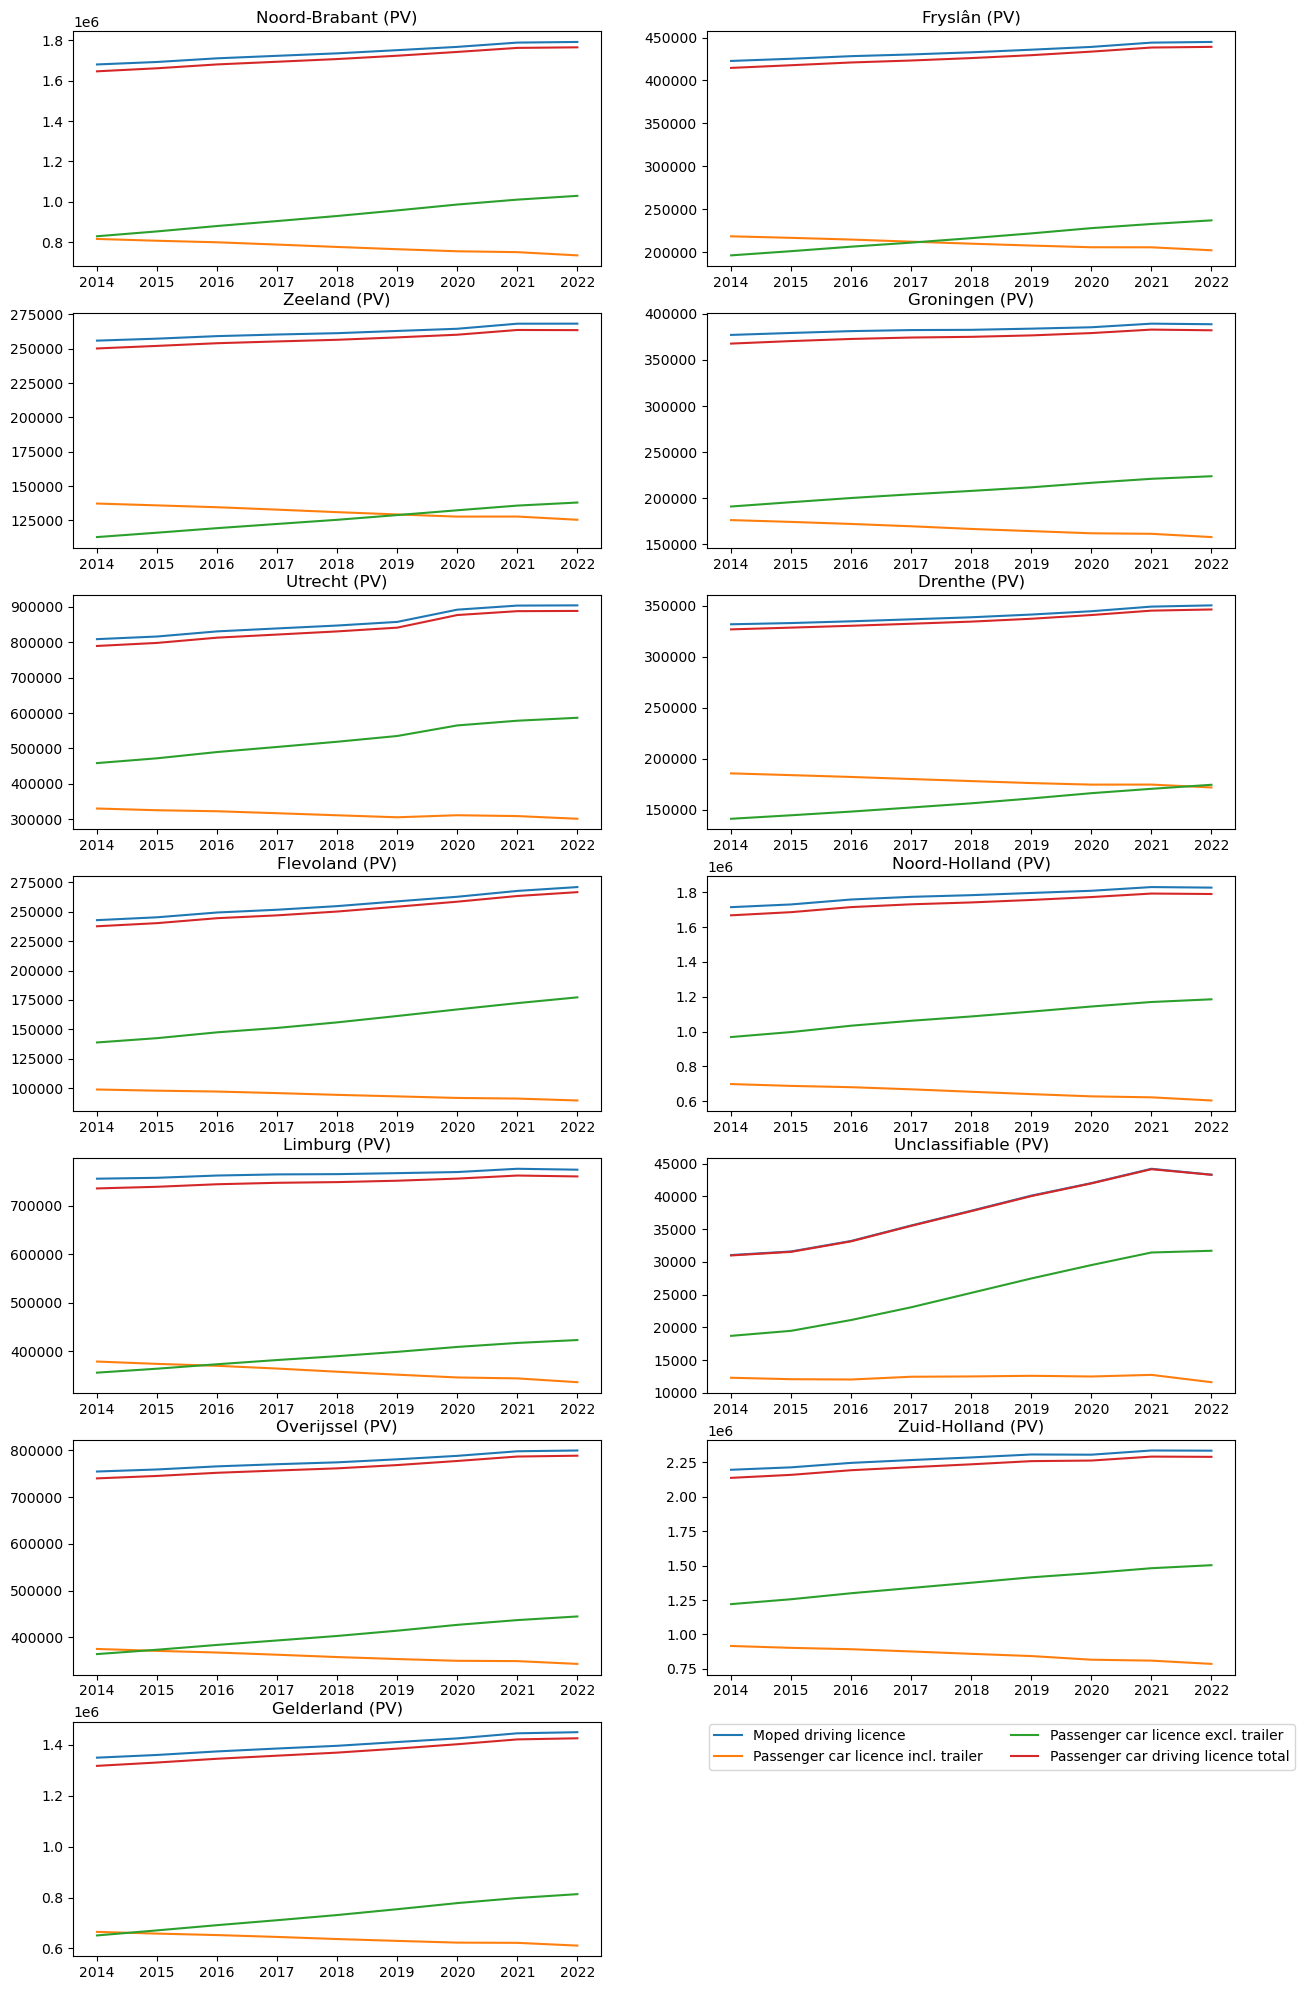

In [11]:
plt.figure(figsize=(15, 25))
for i in range(len(cars)):
    for j in range(len(provinces)) :
        plt.subplot(7, 2, j + 1)
        data_lic_tot = data_lic[(data_lic.Region == provinces[j])
                            & (data_lic.AgeDrivingLicenseHolder == 'Total')
                            & (data_lic.CategoryDrivingLicence == cars[i])]
        plt.plot(data_lic_tot.Periods, data_lic_tot.PeopleWithADrivingLicence_1, 
                 label=f'{cars[i]}')
        plt.title(provinces[j])
    plt.legend( bbox_to_anchor=(1.19, 1.02), fancybox=True, ncol=2)

Further explaination of the cells will be given

## Driver Licenses per Region

Firstly, all the different datasets are directly imported from the CBS with the packages obsodata, this can take a few minutes depending on the internet connection

Then the regio dataset is filtered for all the values we want to know 

In [12]:
# First, the region and years which will be looked at, are defined.

provinces = ['Nederland', 'The Netherlands', 'Groningen (PV)','Fryslân (PV)','Drenthe (PV)','Overijssel (PV)',
 'Flevoland (PV)','Gelderland (PV)','Utrecht (PV)','Noord-Holland (PV)',
 'Zuid-Holland (PV)','Zeeland (PV)','Noord-Brabant (PV)','Limburg (PV)'] # The regions which are selected

years = ['2014','2015','2016','2017','2018','2019','2020','2021'] # The years which are selected

# Then, new filtered DataFrames are created and the data which will be used is extracted from the downloaded datasets.
# After that, some data is computed and added to the filtered dataset

df_regio_filtered = df_regio[df_regio['CategoryDrivingLicence'] == 'Passenger car driving licence total']
df_regio_filtered = df_regio_filtered[df_regio_filtered['AgeDrivingLicenseHolder'] == 'Total']
df_regio_filtered = df_regio_filtered.loc[df_regio_filtered['Region'].isin(provinces)]
df_regio_filtered = df_regio_filtered.loc[df_regio_filtered['Periods'].isin(years)]

df_pop_filtered = df_population[df_population['Sex'] == 'Total male and female']
df_pop_filtered = df_pop_filtered[['Regions', 'Periods', 'PopulationOn31December_20']]
df_pop_filtered = df_pop_filtered.loc[df_pop_filtered['Regions'].isin(provinces)]
df_pop_filtered = df_pop_filtered.loc[df_pop_filtered['Periods'].isin(years)]

df_pop_filtered.reset_index(inplace = True)
df_regio_filtered.reset_index(inplace = True)

df_regio_filtered['Total_Population'] = df_pop_filtered['PopulationOn31December_20']
df_regio_filtered['Percentage'] = df_regio_filtered['PeopleWithADrivingLicence_1'] / df_regio_filtered['Total_Population'] * 100


Now the dataset is filtered, some data can be extracted and a nice animation can be plotted

In [13]:

for year in years:
    df_1 = df_regio_filtered[df_regio_filtered['Periods'] == year]
    fig = px.bar(df_1, x= 'Region', y= 'Percentage', color = 'Region', range_y = [55,70], title = 'Percentage Driver License per Region ' + year)
    fig.update_layout(xaxis={'categoryorder':'total ascending'})
    fig.show()
    fig.write_image(f'Images/DriverLicense_{year}.png', engine = "kaleido")
    
fig = px.bar(df_regio_filtered, x= 'Region', y= 'Percentage', color = 'Region', animation_frame="Periods", animation_group="Region", range_y = [55,70], title= 'Percentage of driver licenses')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

As can be seen in the plot above, there is a big difference in the percentage of driver licenses per region. Drenthe for example has the highest percentage in 2021 with 69,3% compared to Flevoland with only 60,6%. The plots represent our expectations. The provinces with the bigger cities (Noord- & Zuid- Holland, Flevoland and Utrecht) and therefore better public transport opportunities score lower than the national average of 65%. The provinces which are predominantly rural, have a higher percentage of driver licenses (Drenthe, Zeeland etc). 

## Trips per mode of travel per region

For the region characterisitcs of Public Transport use, only the years 2018 and 2019 are considered as this are the non-covid years which are available for data

In [14]:
# First, the modes and years which are looked at are defined
modes = ['Passenger car (driver)', 'Passenger car (passenger)', 'Train', 'Bus/metro'] # Add 'Total'
years = ['2018','2019']


# Then, again, the data is filtered

df_trips_filtered = df_trips[df_trips['TripCharacteristics'] == 'Total']
df_trips_filtered = df_trips_filtered.loc[df_trips_filtered['Margins'] == 'Value']
df_trips_filtered = df_trips_filtered[['ModesOfTravel', 'TripCharacteristics', 'RegionCharacteristics', 'Periods', 'Trips_1', 'Trips_4']]
df_trips_filtered = df_trips_filtered.loc[df_trips_filtered['RegionCharacteristics'].isin(provinces)]
df_trips_filtered = df_trips_filtered.loc[df_trips_filtered['Periods'].isin(years)]
df_trips_filtered = df_trips_filtered.loc[df_trips_filtered['ModesOfTravel'].isin(modes)]



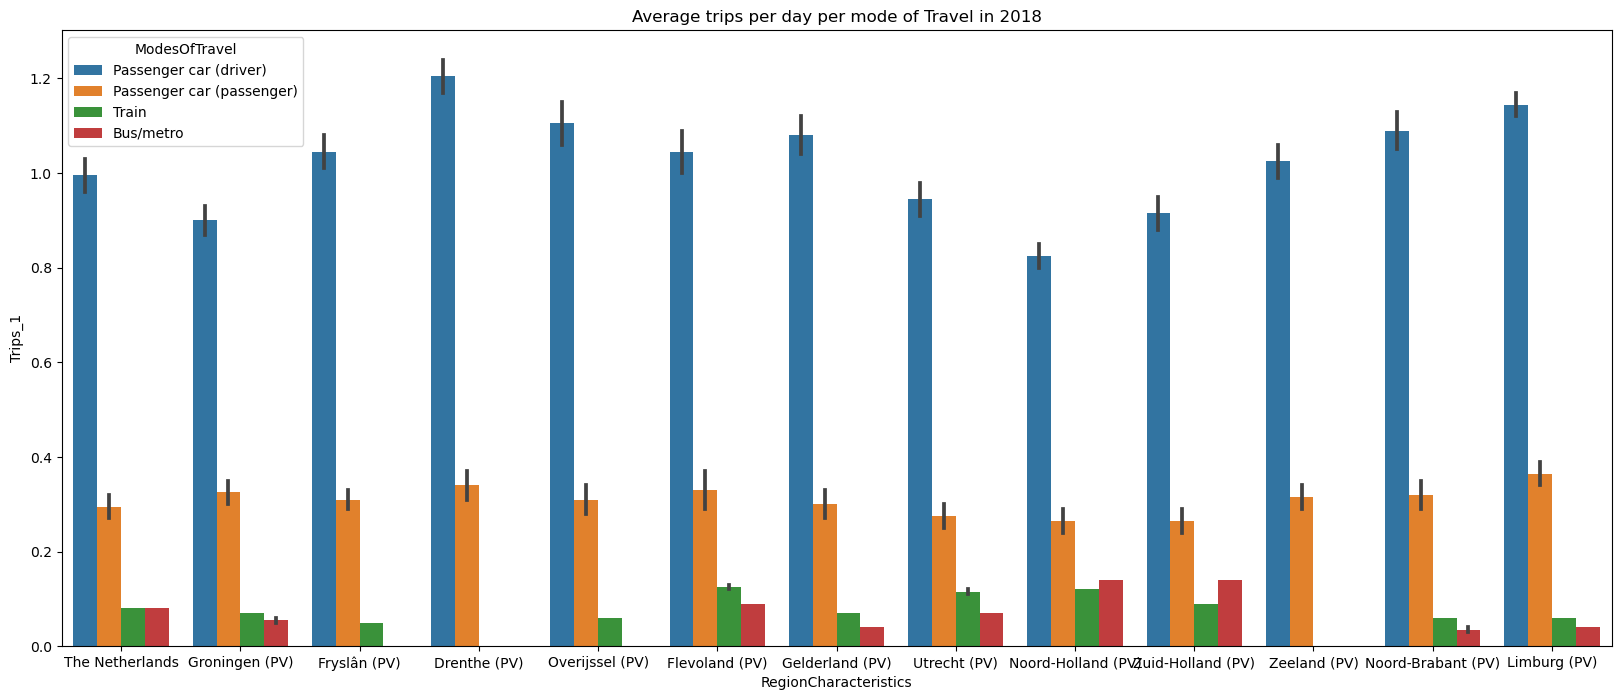

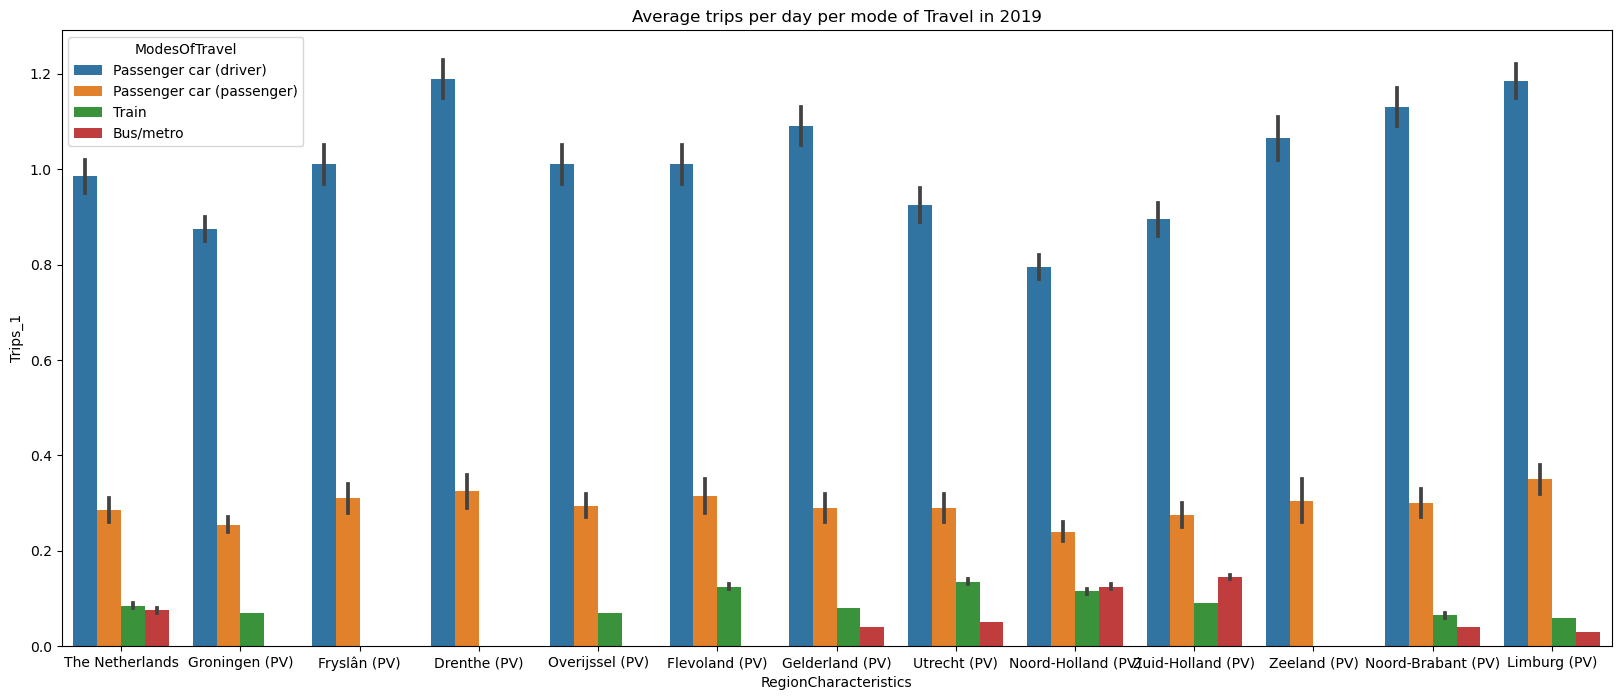

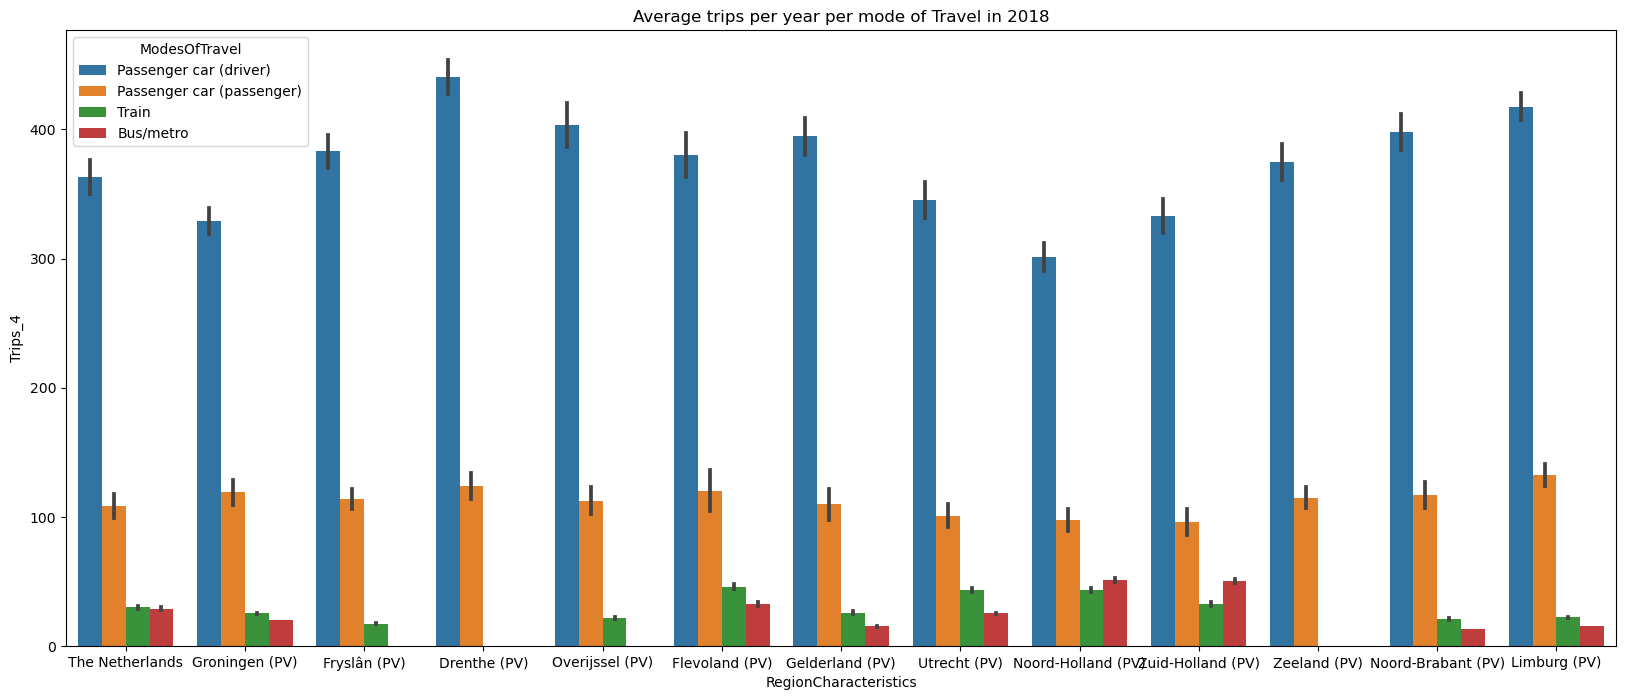

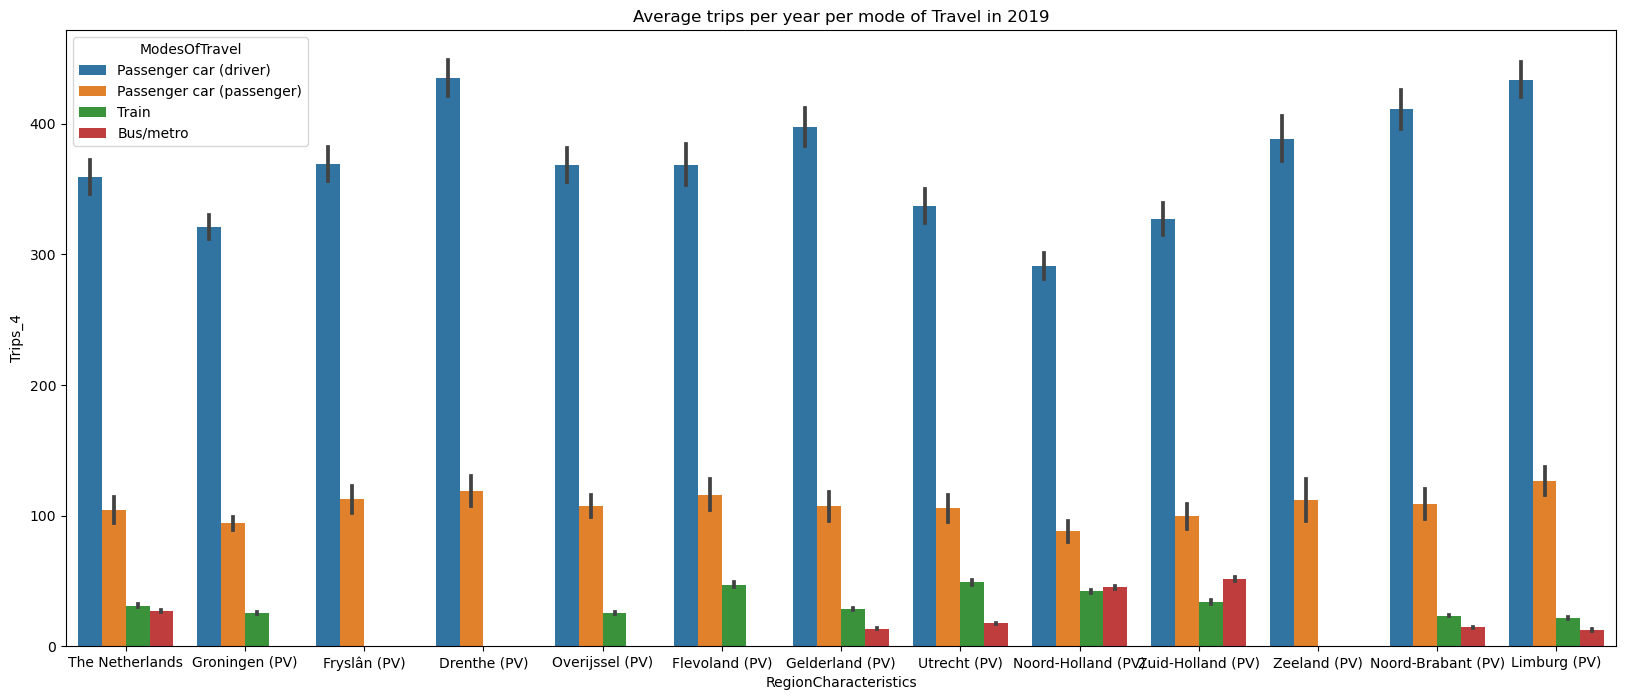

In [15]:
for year in years:
    df = df_trips_filtered[df_trips_filtered['Periods'] == year]
    plt.figure(figsize = (20,8))
    sns_plot = sns.barplot(x= 'RegionCharacteristics', y= 'Trips_1', data = df, hue = 'ModesOfTravel')
    sns_plot.figure.savefig(f'Images/Barplot{year}.png')
    plt.title(f'Average trips per day per mode of Travel in {year}')
    plt.show()

for year in years:
    df = df_trips_filtered[df_trips_filtered['Periods'] == year]
    plt.figure(figsize = (20,8))
    sns_plot = sns.barplot(x= 'RegionCharacteristics', y= 'Trips_4', data = df, hue = 'ModesOfTravel')
    sns_plot.figure.savefig(f'Images/Total_trips_{year}.png')
    plt.title(f'Average trips per year per mode of Travel in {year}')
    plt.show()


From these plots, it is very clear that the regions which have more driver licenses on avarage, also have more car trips than average. Furthermore, the provinces Noord & Zuid Holland (Randstad) do also have a lot of public transport trips as this is very accessible in these regions. 

Sadly, there is some data missing from the public transport trips of Zeeland, Friesland en Drenthe to make a complete comparison


## Driving license and public transport use

In this section we want to find out what the relation is between having a driving licence and people's use of public transport. Our hypothesis is that people with a driving licence will make less use of public transport than people who do not have a driving licence.

Firstly, the data set is filtered again

In [16]:
data_traffic_original.set_index('ID', inplace=True)
data_traffic = data_traffic_original.rename({'UseOfPublicTransport_2': 'Daily public transport use %'}, axis = 1)
data_traffic = data_traffic.rename({'TrafficParticipation_1': 'Daily traffic participation %'}, axis = 1)
data_traffic = data_traffic.rename({'Periods': 'Year'}, axis = 1)
data_traffic = data_traffic.drop(columns=['Population', 'Margins'])
data_traffic = data_traffic[(data_traffic.Sex == 'Total male and female')]


Personal_Characteristics = ["Driver's license, pass. car, in own name",
       "Driver's license, passenger car in hh",
       "Driver's license, no passenger car in hh",
       "No driver's license; 17 years or older",] 
    
#selecting rows based on condition 
data_traffic_licence = data_traffic[data_traffic['PersonalCharacteristics'].isin(Personal_Characteristics)]

data_traffic.head()

Sex PersonalCharacteristics  Year  \
ID                                                        
0   Total male and female           Total persons  2018   
1   Total male and female           Total persons  2019   
2   Total male and female           Total persons  2020   
3   Total male and female           Total persons  2021   
4   Total male and female           Total persons  2018   

    Daily traffic participation %  Daily public transport use %  
ID                                                               
0                            82.9                           8.6  
1                            81.9                           8.6  
2                            73.8                           3.9  
3                            78.1                           4.2  
4                            82.5                           8.3

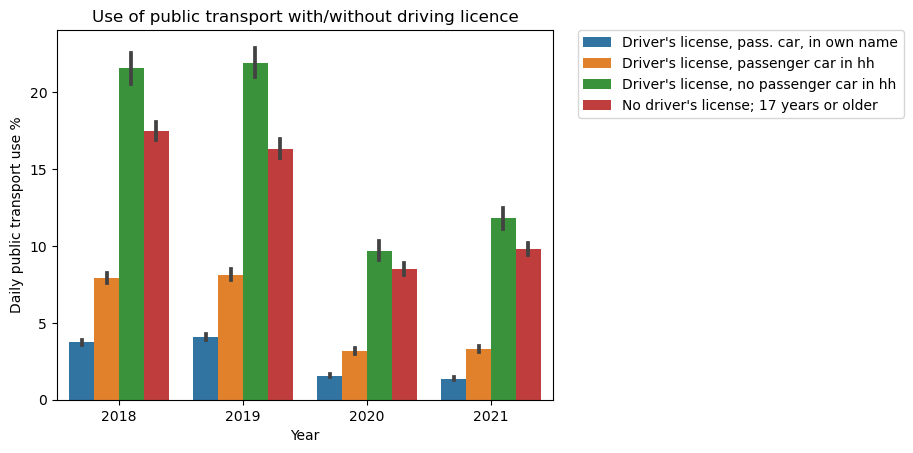

In [17]:
sns_plot = sns.barplot(x='Year', y='Daily public transport use %', data=data_traffic_licence, hue ='PersonalCharacteristics')
sns_plot.figure.savefig('Images/PT_use_vs_DL.png')
plt.title('Use of public transport with/without driving licence')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

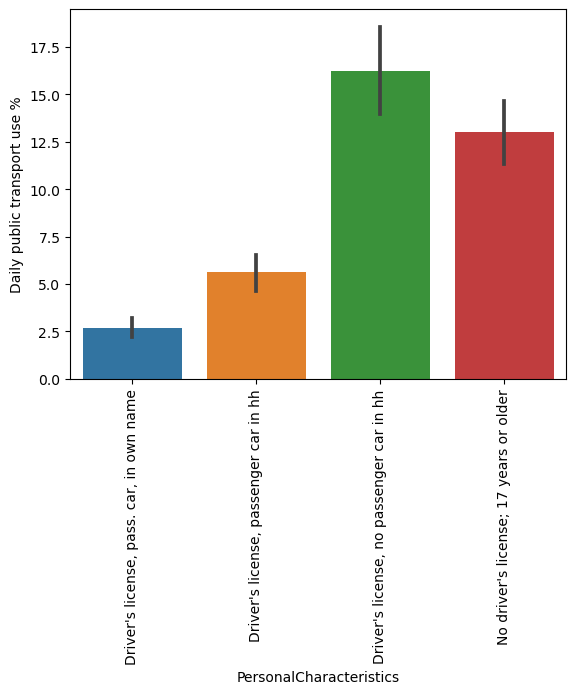

In [18]:
sns.barplot(x='PersonalCharacteristics', y='Daily public transport use %', data=data_traffic_licence)
plt.xticks(rotation=90)
sns_plot.figure.savefig('Images/Daily_PTuse.png')
plt.show()

We are planning to make more plots of the different years to find out which group of 'PersonalCharacteritics' makes the fewest trips with Public Transport and try to find a reason why our hypothesis does not seem to be true.

## Driver license  vs ov-chipcard

In this section, we look at the distance travelled by car and train per day for students with a student ov chipcard and persons without a student ov chipcard. Do students with a student ov chipcard only travel with the train or do they still use a car and how much do persons without a student ov chipcard use the train? Also, the comparison is made between students and their age category.

In [19]:
data_mot_original.set_index('ID', inplace=True) # set ID as index
data_mot = data_mot_original[['PersonalCharacteristics', 'ModesOfTravel','DistanceTravelled_2']]

# rename columns
data_mot.columns = ['Personal characteristics','Modes of travel','Distance travelled']

# selecting rows based on conditions
options_ovchipcard = ['Students with week pass publ. transp.',
                    'Persons without student publ.transp.card'] 
options_travelmode = ['Passenger car (driver)','Train']
rslt_data_mot = data_mot[data_mot['Personal characteristics'].isin(options_ovchipcard) &
                    data_mot['Modes of travel'].isin(options_travelmode)] 

# selecting rows based on conditions
options_pc = ['Students with week pass publ. transp.',
                "Age: 18 to 24 years"] 
options_travelmode = ['Passenger car (driver)','Train']
rslt_data_mot2 = data_mot[data_mot['Personal characteristics'].isin(options_pc) &
                    data_mot['Modes of travel'].isin(options_travelmode)] 


After the data is filtered, the remaining DataFrame can be used to plot different statistics 

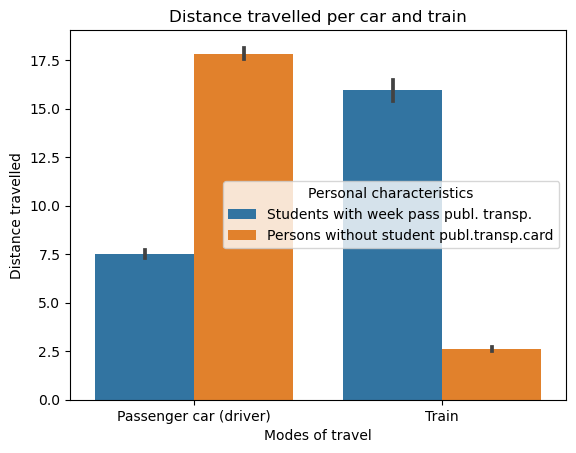

In [20]:
student_ov_plot = sns.barplot(x='Modes of travel', y='Distance travelled', data=rslt_data_mot, hue ='Personal characteristics')
plt.title(f'Distance travelled per car and train')
student_ov_plot.figure.savefig('Images/student_ov1.png')
plt.show()

As you can see in the barplot, the distance travelled with train by students with a week pass is seven times as big as by people without a student ov chipcard. This makes sense because the train costs more money with a normal ov chipcard. Although students with a week pass still use the car quite a lot: 7,5 kilometers a day on average. 

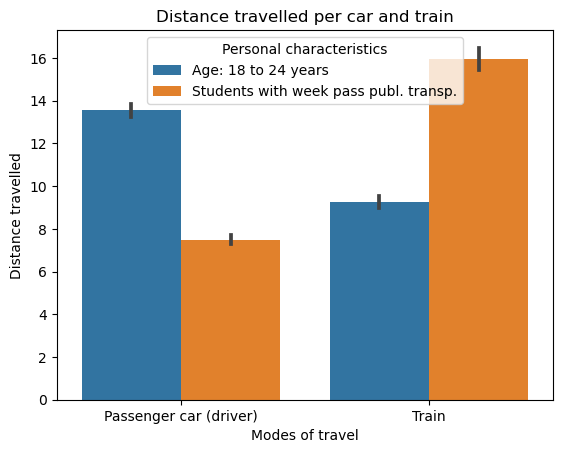

In [21]:
student_ov_age_plot = sns.barplot(x='Modes of travel', y='Distance travelled', data=rslt_data_mot2, hue ='Personal characteristics')
plt.title(f'Distance travelled per car and train')
student_ov_plot.figure.savefig('Images/student_ov2.png')
plt.show()

In this plot it is visible that people in the age 18 to 24 years travel greater distances with the car than with the train. The opposite of students with a student ov chipcard, which are mainly in the same age category. But a big part of this age category is already working because they finish their education young. They probably have more money to spend so they travel with car and they can't have a student ov chipcard.

## Travel motives

In this subcategory, the travel motives of people are overlooked and the influence of having a driver license on travel motive

Firstly, different datasets are created by filtering the main dataset into different DataFrames called data_motief_x. These are then plotted individually

In [22]:
student_ov = ['OV-Studentenkaart: geen', 'OV-Studentenkaart: weekabonnement','OV-Studentenkaart: weekendabonnement']

#Constructing different DataFrames
data_motief_2 = data_motief.groupby(['Persoonskenmerken', 'Perioden']).sum().reset_index()
data_motief_3 = data_motief.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()

filtered_student_ov = data_motief_3[data_motief_3['Persoonskenmerken'].isin(student_ov)]
data_motief_4 = filtered_student_ov.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()

data_motief_5 = data_motief.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()
display(data_motief_5)

filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]
data_motief_6 = filtered_student_ov.groupby(['Persoonskenmerken', 'Perioden']).sum().reset_index()

filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]
data_motief_7 = filtered_student_ov.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()

filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]
data_motief_8 = filtered_student_ov.groupby(['Reismotieven','Persoonskenmerken']).sum()

Persoonskenmerken  \
0    Geen rijbewijs; jonger dan 17 jaar   
1    Geen rijbewijs; jonger dan 17 jaar   
2    Geen rijbewijs; jonger dan 17 jaar   
3    Geen rijbewijs; jonger dan 17 jaar   
4    Geen rijbewijs; jonger dan 17 jaar   
..                                  ...   
345                     Totaal personen   
346                     Totaal personen   
347                     Totaal personen   
348                     Totaal personen   
349                     Totaal personen   

                               Reismotieven         ID  Verplaatsingen_1  \
0         Diensten, persoonlijke verzorging  509546664              5.28   
1    Onderwijs volgen, cursus, kinderopvang  510383016           1238.43   
2                      Overige reismotieven  512055720             82.40   
3                          Toeren, wandelen  511637544             68.30   
4                                    Totaal  508292136           3892.43   
..                                      ...        ...               ...   
345                   Uitgaan, sport, hobby  369039528            653.90   
346                    Van en naar het werk  366530472            743.90   
347                         Visite, logeren  368621352            417.36   
348             Winkelen, boodschappen doen  367785000            894.46   
349                  Zakelijk, beroepsmatig  366948648            118.99   

     Afstand_2  Reisduur_3  Verplaatsingen_4   Afstand_5  Reisduur_6  
0        24.22       90.55            1936.0      8838.0       550.6  
1      6600.03    25675.91          452311.0   2410069.0    156269.7  
2       238.34     1279.62           30091.0     87047.0      7788.7  
3       353.06     4059.52           24963.0    128976.0     24713.0  
4     27809.91    95424.64         1421585.0  10155940.0    580841.0  
..         ...         ...               ...         ...         ...  
345    8403.27    19879.68          238821.0   3068831.0    121004.5  
346   13878.92    20434.44          271692.0   5068436.0    124377.3  
347    8549.04    11824.02          152419.0   3121968.0     71972.0  
348    4877.65    12690.57          326659.0   1781450.0     77247.8  
349    3355.15     4184.95           43476.0   1225292.0     25471.9  

[350 rows x 9 columns]

In [23]:
fig = px.bar(data_motief_2, x = 'Verplaatsingen_1', y = 'Persoonskenmerken', color = 'Persoonskenmerken',
             orientation = 'h', text_auto = '.2s', animation_frame = 'Perioden', height = 1000)
fig.update_traces(textposition="outside")
fig.update_layout(showlegend = False)
fig.show()

In [24]:
fig = px.bar(data_motief_3, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Reismotieven',
             orientation = 'h', text_auto = '.2s', animation_frame = 'Persoonskenmerken')
fig.update_traces(textposition="outside")
fig.show()

In [25]:
fig = px.bar(data_motief_5, x = 'Verplaatsingen_1', y = 'Persoonskenmerken', color = 'Persoonskenmerken',
              orientation = 'h', text_auto = '.2s', animation_frame = 'Reismotieven')
fig.update_traces(textposition="outside")
fig.update_layout(showlegend = False)
fig.show()

In [26]:
fig = px.bar(data_motief_6, x = 'Verplaatsingen_1', y = 'Persoonskenmerken', color = 'Persoonskenmerken',
              orientation = 'h', text_auto = '.2s', animation_frame = 'Perioden')
fig.update_traces(textposition="outside")
fig.update_layout(showlegend = False)
fig.show()

In [27]:
filtered_student_ov = data_motief[data_motief['Persoonskenmerken'].isin(student_ov)]
data_motief_6 = filtered_student_ov.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()
data_motief_5 = filtered_student_ov.groupby(['Persoonskenmerken', 'Perioden']).sum().reset_index()

fig = px.bar(data_motief_6, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Reismotieven',
              orientation = 'h', text_auto = '.2s', animation_frame = 'Persoonskenmerken')
fig.update_layout(showlegend = False)
fig.show()

In [28]:
fig = px.bar(data_motief_7, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Persoonskenmerken',
              orientation = 'h', text_auto = '.2s', barmode = 'group')
fig.update_traces(textposition="outside")
fig.update_yaxes(categoryorder = 'total ascending')
fig.update_layout(showlegend = False)
fig.show()

In [30]:
auto = [ 'Rijbewijs, personenauto op eigen naam', 'Rijbewijs, personenauto in hh', 'Rijbewijs, geen personenauto in hh',
       'Geen rijbewijs; wel 17 jaar of ouder','Geen rijbewijs; jonger dan 17 jaar']

filtered_auto = data_motief[data_motief['Persoonskenmerken'].isin(auto)]
data_motief_8 = filtered_auto.groupby(['Persoonskenmerken', 'Reismotieven']).sum().reset_index()


fig = px.bar(data_motief_8, x = 'Verplaatsingen_1', y = 'Reismotieven', color = 'Persoonskenmerken',
              orientation = 'h', text_auto = '.2s', barmode = 'group')
fig.update_traces(textposition="outside")
fig.update_yaxes(categoryorder = 'total ascending')
fig.show()

Explainations of all the plots will be added in the future, but that was not done yet due to lack of time. 